# Exercise 1

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars, belonging to three different customer segments. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
A = np.array(data)[:, 1:].astype(np.float64).T  # Matrix containing the data (num features x num wines)
labels = np.array(data)[:, 0].astype(np.int32)  # The label of each wine (i.e., customer segment)
groups = (1, 2, 3)  # Customer segments: 1 = low quality, 2 = medium quality, 3 = high quality
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols',
            'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
            'Hue', 'OD280', 'Proline']  # Feature descriptions
```

1. **How many features? How many samples? How many samples belong to each customer segment?**

2. **Normalize the data** so that each feature has zero mean and unitary standard deviation.

3. **Perform PCA on the dataset by means of the SVD decomposition.** Then, plot the trend of:
   - The singular values $ \sigma_k $;
   - The cumulative fraction of singular values:  
     $$
     \frac{\sum_{i=1}^q \sigma_i}{\sum_{i=1}^k \sigma_i}
     $$
   - The fraction of the "explained variance":  
     $$
     \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^k \sigma_i^2}.
     $$
   **Comment on the results.**

4. **Compute a matrix** containing the principal components associated with the dataset.

5. **Generate a scatterplot** of the first two principal components of the dataset, grouped by label. Draw a line that separates, as well as you manage, the category of low customer segment wines from the rest of the wines (choose the intercept and slope of the line by hand, trying to achieve a good result).

6. Based on the line from point 5, **define a predictor** to detect wines of the low customer segment. Then, compute the number of:
   - True positives (TP),
   - False positives (FP),
   - True negatives (TN),
   - False negatives (FN).

   Finally, compute:
   - **Sensitivity:**  
     $$
     \text{Sensitivity} = \frac{\text{TP}}{\text{TP + FN}}
     $$
   - **Specificity:**  
     $$
     \text{Specificity} = \frac{\text{TN}}{\text{TN + FP}}
     $$
   - **Accuracy:**  
     $$
     \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.
     $$

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
A = np.array(data)[:,1:].astype(np.float64).T # matrix containing the data (num features x num wines)
labels = np.array(data)[:,0].astype(np.int32) # the label of each wine (i.e. customer segment)
groups = (1,2,3) # customer segments: 1 = low quality; 2 = medium quality; 3 = high quality
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
			'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
			'Hue', 'OD280', 'Proline'] # features descriptions

1. **How many features? How many samples? How many samples belong to each customer segment?**


In [145]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [146]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [147]:
# Count the number of wines in each segment
for i in groups:
	print('Number of wines in segment', i, ':', np.sum(labels == i))

Number of wines in segment 1 : 59
Number of wines in segment 2 : 71
Number of wines in segment 3 : 48


From the first look at the dataset we can assumes that there are 14 features, 178 samples. 59, 71 and 48 samples respectively belong to customer segments 1, 2 and 3.

2. **Normalize the data** so that each feature has zero mean and unitary standard deviation.


In [148]:
A.shape

(13, 178)

In [149]:
A_centered = A - np.mean(A, axis=1)[:, None] # center the data
A_standardized = A_centered / np.std(A_centered, axis=1)[:, None] # standardize the data


3. **Perform PCA on the dataset by means of the SVD decomposition.** Then, plot the trend of:
   - The singular values $ \sigma_k $;
   - The cumulative fraction of singular values:  
     $$
     \frac{\sum_{i=1}^q \sigma_i}{\sum_{i=1}^k \sigma_i}
     $$
   - The fraction of the "explained variance":  
     $$
     \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^k \sigma_i^2}.
     $$
   **Comment on the results.**

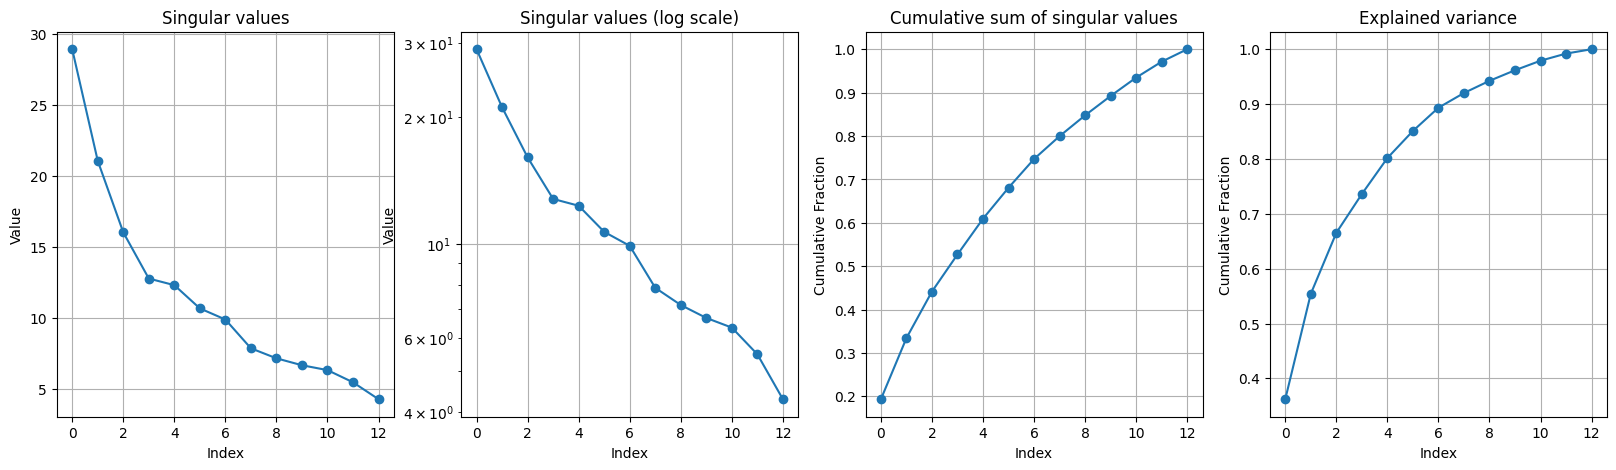

In [150]:
U, s, Vt = np.linalg.svd(A_standardized, full_matrices=False) # singular value decomposition

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# plot the singular values
ax[0].plot(s, 'o-')
ax[0].set_title('Singular values')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Value')
ax[0].grid()
# plot the singular values on a log scale
ax[1].semilogy(s, 'o-')
ax[1].set_title('Singular values (log scale)')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Value')
ax[1].grid()

# plot the cumulative fraction of singular values
ax[2].plot(np.cumsum(s) / np.sum(s), 'o-')
ax[2].set_title('Cumulative sum of singular values')
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Cumulative Fraction')
ax[2].grid()
# plot the explained variance
explained_variance = s**2 / np.sum(s**2)
ax[3].plot(np.cumsum(explained_variance), 'o-')
ax[3].set_title('Explained variance')
ax[3].set_xlabel('Index')
ax[3].set_ylabel('Cumulative Fraction')
ax[3].grid()
plt.show()

#### Comment:

From the plots we can see how all the singular values have a relevant values so it may not be too straightforward to reduce the dimensionality of the dataset. 
It is also important to notice that there is no clear elbow in the explained variance plot, so it is hard to say how many components are needed to explain the variance of the dataset.
Nonetheless almost 90% of the variance is explained by half of the singular values.

4. **Compute a matrix** containing the principal components associated with the dataset.

In [151]:
principal_directions = U.T # principal directions
principal_components = np.dot(principal_directions, A_standardized) # principal components

5. **Generate a scatterplot** of the first two principal components of the dataset, grouped by label. Draw a line that separates, as well as you manage, the category of low customer segment wines from the rest of the wines (choose the intercept and slope of the line by hand, trying to achieve a good result).


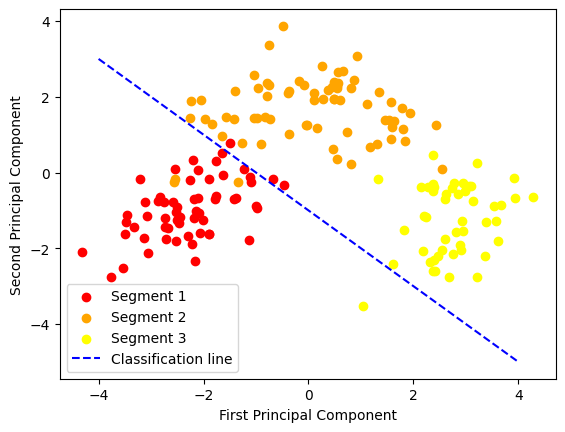

In [152]:
# plot the first two principal components

colors = ['r', 'orange', 'yellow']
for i in groups:
	plt.scatter(principal_components[0, labels == i], principal_components[1, labels == i], c=colors[i-1], label='Segment '+str(i))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# line y = -x - 1
def y(x):
	return -x - 1
x = np.linspace(-4, 4, 100)
plt.plot(x, y(x), 'b--', label='Classification line')
plt.legend()

plt.show()


6. Based on the line from point 5, **define a predictor** to detect wines of the low customer segment. Then, compute the number of:
   - True positives (TP),
   - False positives (FP),
   - True negatives (TN),
   - False negatives (FN).

   Finally, compute:
   - **Sensitivity:**  
     $$
     \text{Sensitivity} = \frac{\text{TP}}{\text{TP + FN}}
     $$
   - **Specificity:**  
     $$
     \text{Specificity} = \frac{\text{TN}}{\text{TN + FP}}
     $$
   - **Accuracy:**  
     $$
     \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.
     $$

In [153]:

xs = principal_components[0, :]
ys = principal_components[1, :]

predictions = [1 if ys[i] < y(xs[i]) else 0 for i in range(len(xs))]
true_labels = [1 if labels[i] == 1 else 0 for i in range(len(xs))]

tp = sum([1 for i in range(len(xs)) if predictions[i] == 1 and true_labels[i] == 1])
tn = sum([1 for i in range(len(xs)) if predictions[i] == 0 and true_labels[i] == 0])
fp = sum([1 for i in range(len(xs)) if predictions[i] == 1 and true_labels[i] == 0])
fn = sum([1 for i in range(len(xs)) if predictions[i] == 0 and true_labels[i] == 1])

print("True positives:", tp)
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)

accuracy = (tp + tn) / len(xs)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.3f}')
print(f'Sensitivity: {sensitivity:.3f}')
print(f'Specificity: {specificity:.3f}')

True positives: 56
True negatives: 115
False positives: 4
False negatives: 3
Accuracy: 0.961
Sensitivity: 0.949
Specificity: 0.966


#### Note:

In the shared solutions by the professor the FP and FN values are swapped.

 ---

# Exercise 2

Consider the minimization of the 2D quadratic function:  
$$
f(x) = \frac{1}{2} \left(x_1^2 + \eta x_2^2\right),
$$
where $ x = (x_1, x_2) $ and $ \eta > 0 $.

1. **Use the `contourf` command** to plot the contour lines of the function for different values of $ \eta $. Use the following syntax:

```python
	import numpy as np
	import matplotlib.pyplot as plt

	x = np.linspace(xmin, xmax, Nx)
	y = np.linspace(ymin, ymax, Ny)
	[XX, YY] = np.meshgrid(x, y)
	F = (XX ** 2 + eta * YY ** 2) / 2
	plt.contourf(XX, YY, F, Ncontour)
```



2. **How does $ \eta $ impact the numerical solution of the problem?**


3. Let us consider the gradient descent (GD) algorithm; the iteration relation is given by:
   
	$$x^{(k+1)} = x^{(k)} - \tau_k \nabla f \left(x^{(k)}\right)$$
	
	where $ \tau_k > 0 $.  

	In the convex case, if $ f $ is of class $ C^2 $, in order to have convergence, we must have:
	
	$$ 0 < \tau_k < \frac{2}{\sup_x \| H_f(x) \|}$$
	
	where $ H_f(x) $ is the Hessian of $ f $.  

	**Compute the maximum value of $ \tau_k $ to have convergence.**


4. **Implement the GD method** with a constant step size. Assume $ \eta = 4 $ and $ x_0 = (0.9, 0.3) $.  
Display the iterations on the contour figure for different values of the step size. **Comment on the results.**


5. Consider the exact line search method for the dynamic choice of the step size. In this method, at each step, we choose:
$$
\tau_k = \arg\min_s f\left(x^{(k)} - s \nabla f\left(x^{(k)}\right)\right).
$$
**Compute the explicit expression of $ \tau_k $** given by the exact line search method for the function $ f(x) $.


6. **Implement the GD method with variable step size** using the expression derived in the previous point and apply the method to the minimization of the function $ f(x) $.  
Display the iterations on the contour figure. **Comment on the results.**

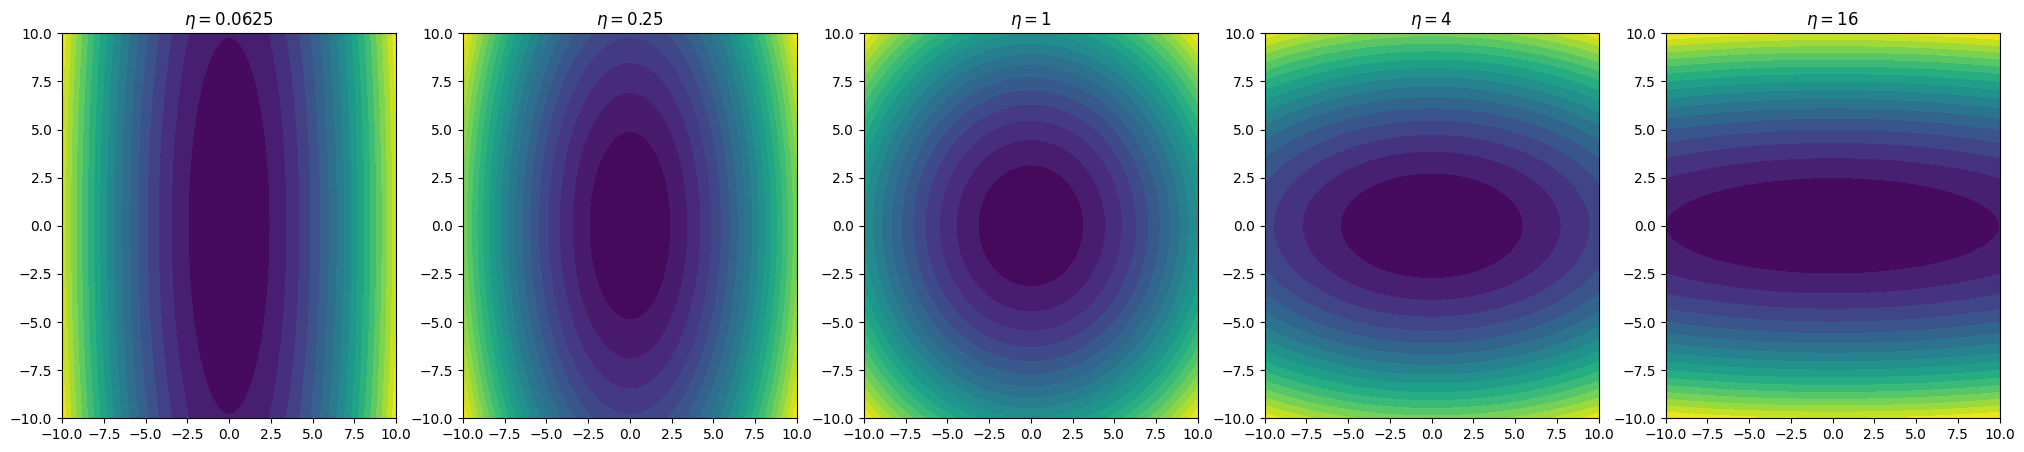

In [154]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -10, 10
ymin, ymax = -10, 10

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
[XX, YY] = np.meshgrid(x, y)

etas = [2**i for i in range(-4, 5, 2)]

fig, ax = plt.subplots(1, len(etas), figsize=(5*len(etas), 5))

for i, eta in enumerate(etas):
	F = (XX ** 2 + eta * YY ** 2) / 2
	ax[i].contourf(XX, YY, F, 20)
	ax[i].set_title(f'$\\eta = {eta}$')

plt.show()

2. **How does $ \eta $ impact the numerical solution of the problem?**

The value of $ \eta $ does not impact the numerical solution of the problem, given that the minima always occurs at $ x = (0, 0) $.
Numerically this is due to de fact that the gradient of the function is $ \nabla f(x) = (x_1, \eta x_2) $, and the hessian is $ H_f(x) = \begin{bmatrix} 1 & 0 \\ 0 & \eta \end{bmatrix} $, which is positive definite for $ \eta > 0 $. This means that the function is convex and has a unique minimum at $ x = (0, 0) $, the only critical point. (see cell below for code proof)

In [155]:
import sympy as sp

# Define the symbols with the assumption that eta > 0
x1, x2 = sp.symbols('x1 x2')
eta = sp.symbols('eta', positive=True)

# Define the function
f = 0.5 * (x1**2 + eta * x2**2)

# Calculate the Jacobian (gradient)
grad_f = [sp.diff(f, var) for var in (x1, x2)]

# Calculate the Hessian
hessian_f = sp.Matrix([[sp.diff(grad, var) for var in (x1, x2)] for grad in grad_f])

# Determine the critical points by setting the gradient to zero
critical_points = sp.solve(grad_f, (x1, x2))
if type(critical_points) != list:
	critical_points = [critical_points]

# Determine the type of each critical point
types = []

for point in critical_points:
	hessian_at_point = hessian_f.subs({x1: point[x1], x2: point[x2]})
	eigenvalues = hessian_at_point.eigenvals()
	print(f'Eigenvalues at {point}: {eigenvalues}')
	if all(val > 0 for val in eigenvalues):
		types.append('Minimum')
	elif all(val < 0 for val in eigenvalues):
		types.append('Maximum')
	else:
		types.append('Saddle point')

# Display the results
print(f"Jacobian (Gradient): {grad_f}")
print(f"Hessian: {hessian_f}")
print(f"Critical Points: {critical_points}")
print(f"Types of Critical Points: {types}")


Eigenvalues at {x1: 0.0, x2: 0.0}: {1.00000000000000: 1, 1.0*eta: 1}
Jacobian (Gradient): [1.0*x1, 1.0*eta*x2]
Hessian: Matrix([[1.00000000000000, 0], [0, 1.0*eta]])
Critical Points: [{x1: 0.0, x2: 0.0}]
Types of Critical Points: ['Minimum']


3. Let us consider the gradient descent (GD) algorithm; the iteration relation is given by:
   
	$$x^{(k+1)} = x^{(k)} - \tau_k \nabla f \left(x^{(k)}\right)$$
	
	where $ \tau_k > 0 $.  

	In the convex case, if $ f $ is of class $ C^2 $, in order to have convergence, we must have:
	
	$$ 0 < \tau_k < \frac{2}{\sup_x \| H_f(x) \|}$$
	
	where $ H_f(x) $ is the Hessian of $ f $.  

	**Compute the maximum value of $ \tau_k $ to have convergence.**


#### answer:
In the light of the sympy computation in the previous cell, we have obtained the hessian.

Given that the hessian of the function is $ H_f(x) = \begin{bmatrix} 1 & 0 \\ 0 & \eta \end{bmatrix} $, the maximum value of $ \tau_k $ to have convergence is $ \tau_k < \frac{2}{\sup_x \| H_f(x) \|} = min(\frac{2}{|\eta|}, 2) $.

#### Note:
the norm that appears in the formula is the spectral norm, which is the maximum singular value of the matrix. In this case, the hessian is a diagonal matrix, so the spectral norm is the maximum of the diagonal elements, which is $ \eta $.


4. **Implement the GD method** with a constant step size. Assume $ \eta = 4 $ and $ x_0 = (0.9, 0.3) $.  
Display the iterations on the contour figure for different values of the step size. **Comment on the results.**



Converged in 693 iterations to x=[ 1.8717457e-38 -2.4934269e-07]
Algorithm did not converge
Converged in 48 iterations to x=[9.0611474e-07 0.0000000e+00]


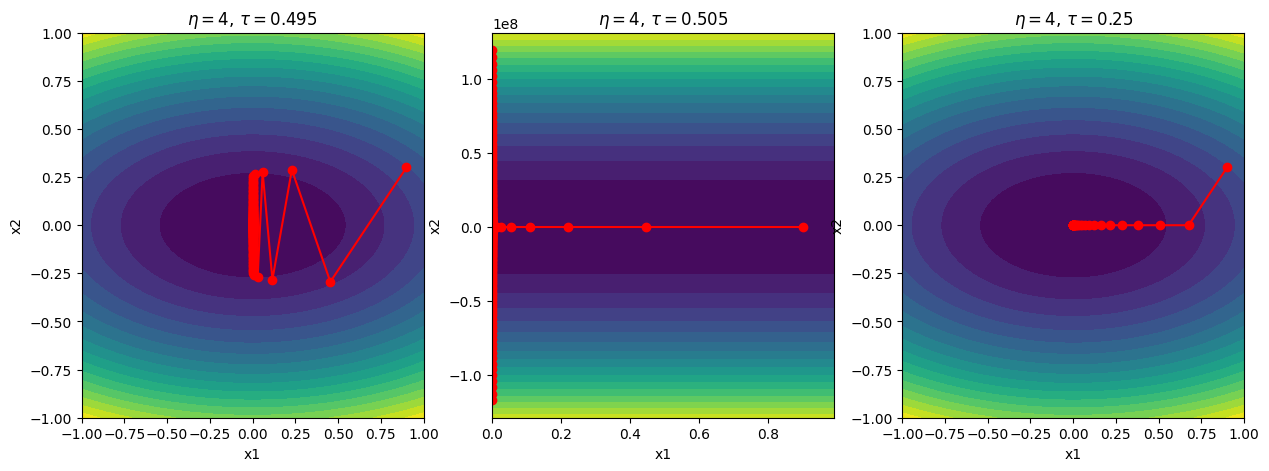

In [156]:
import jax

def GD(x0, f, eta, lr, tol=1e-6, max_iter=1000):
	x = x0
	xs = [x]
	grad = jax.grad(jax.jit(f), argnums=0)
	iter = 0
	while np.linalg.norm(grad(x, eta)) > tol and iter < max_iter:
		x = x - lr * grad(x, eta)
		iter += 1
		xs.append(x)
	if iter == max_iter:
		print('Algorithm did not converge')
	else:
		print(f'Converged in {iter} iterations to x={x}')
	return xs

def f(x, eta):
	return 0.5 * (x[0]**2 + eta * x[1]**2)

x0 = np.array([0.9, 0.3])
eta = 4

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Tao close to the limit for convergence
tau = 0.5 * 0.99 # not 1 to avoid division overflows/unstable behavior
xs = GD(x0, f, eta, tau)
# countour plot
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
[XX, YY] = np.meshgrid(x, y)
F = (XX ** 2 + eta * YY ** 2) / 2
ax[0].contourf(XX, YY, F, 20)
# plot the path
xs = np.array(xs)
ax[0].plot(xs[:, 0], xs[:, 1], 'ro-')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title(f'$\\eta = {eta}$, $\\tau = {tau}$')

# Tau over the limit for divergence
tau = 0.5 * 1.01 # not 1 to avoid division overflows/unstable behavior
xs = GD(x0, f, eta, tau)
# countour plot
xs = np.array(xs)
x = np.linspace(1.1*np.min(xs[:,0]), 1.1*np.max(xs[:,0]), 100)
y = np.linspace(1.1*np.min(xs[:,1]), 1.1*np.max(xs[:,1]), 100)
[XX, YY] = np.meshgrid(x, y)
F = (XX ** 2 + eta * YY ** 2) / 2
ax[1].contourf(XX, YY, F, 20)
# plot the path
ax[1].plot(xs[:, 0], xs[:, 1], 'ro-')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title(f'$\\eta = {eta}$, $\\tau = {tau}$')

# Tau with optimal value
tau = 0.25
xs = GD(x0, f, eta, tau)
# countour plot
xs = np.array(xs)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
[XX, YY] = np.meshgrid(x, y)
F = (XX ** 2 + eta * YY ** 2) / 2
ax[2].contourf(XX, YY, F, 20)
# plot the path
ax[2].plot(xs[:, 0], xs[:,1], 'ro-')
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')
ax[2].set_title(f'$\\eta = {eta}$, $\\tau = {tau}$')

plt.show()



5. Consider the exact line search method for the dynamic choice of the step size. In this method, at each step, we choose:
$$
\tau_k = \arg\min_s f\left(x^{(k)} - s \nabla f\left(x^{(k)}\right)\right).
$$
**Compute the explicit expression of $ \tau_k $** given by the exact line search method for the function $ f(x) $.



#### answer:

The exact line search method consists in finding the value of $ s $ that minimizes the function $ f(x^{(k)} - s \nabla f(x^{(k)})) $.
This means that we have to solve the equation $ \nabla (f(x^{(k)}) - s \nabla f(x^{(k)})) = 0 $ to find the possible minima. 

Substituting into $ f $, we get:

$$
f\left(x^{(k)} - \tau_k \nabla f\left(x^{(k)}\right)\right) = \frac{1}{2} \left( (x_1^{(k)} - \tau_k \nabla_1 f(x^{(k)}))^2 + \eta (x_2^{(k)} - \tau_k \nabla_2 f(x^{(k)}))^2 \right),
$$

where $ \nabla f(x^{(k)}) = (\nabla_1 f(x^{(k)}), \nabla_2 f(x^{(k)})) = (x_1^{(k)}, \eta x_2^{(k)}) $.

Simplifying further:

$$
f\left(x^{(k)} - \tau_k \nabla f\left(x^{(k)}\right)\right) = \frac{1}{2} \left( (x_1^{(k)} - \tau_k x_1^{(k)})^2 + \eta (x_2^{(k)} - \tau_k \eta x_2^{(k)})^2 \right).
$$

Expanding the terms:

$$
f\left(x^{(k)} - \tau_k \nabla f\left(x^{(k)}\right)\right) = \frac{1}{2} \left( (1 - \tau_k)^2 (x_1^{(k)})^2 + \eta (1 - \tau_k \eta)^2 (x_2^{(k)})^2 \right).
$$

Minimizing $ f $ with respect to $ \tau_k $, take the derivative with respect to $ \tau_k $:

$$
\frac{d}{d\tau_k} f\left(x^{(k)} - \tau_k \nabla f(x^{(k)})\right) = - (1 - \tau_k) (x_1^{(k)})^2 - \eta^2 (1 - \tau_k \eta) (x_2^{(k)})^2.
$$

Setting $ \frac{d}{d\tau_k} = 0 $, we solve:

$$
(1 - \tau_k) (x_1^{(k)})^2 + \eta^2 (1 - \tau_k \eta) (x_2^{(k)})^2 = 0.
$$

Rearranging terms for $ \tau_k $:

$$
(x_1^{(k)})^2 - \tau_k (x_1^{(k)})^2 + \eta^2  (x_2^{(k)})^2 - \tau_k \eta^3 (x_2^{(k)})^2 = 0.
$$


$$
\tau_k \left( (x_1^{(k)})^2 + \eta^3 (x_2^{(k)})^2 \right) = (x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2.
$$

Thus:

$$
\tau_k = \frac{(x_1^{(k)})^2 + \eta^2 (x_2^{(k)})^2}{(x_1^{(k)})^2 + \eta^3 (x_2^{(k)})^2}.
$$



In [157]:
# sympy check
import sympy as sp

# Define the symbols
x1, x2, tau_k, eta = sp.symbols('x1 x2 tau_k eta')

# Define the function
f = 0.5 * (x1**2 + eta * x2**2)

# Define the gradient
grad_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Define the expression for the function after a step in the direction of the gradient
f_step = 0.5 * ((x1 - tau_k * grad_f[0])**2 + eta * (x2 - tau_k * grad_f[1])**2)

# Take the derivative of the function with respect to tau_k
df_step_dtau = sp.diff(f_step, tau_k)

# Solve for tau_k
tau_k_solution = sp.solve(df_step_dtau, tau_k)[0]

tau_k_solution

(eta**2*x2**2 + x1**2)/(eta**3*x2**2 + x1**2)

6. **Implement the GD method with variable step size** using the expression derived in the previous point and apply the method to the minimization of the function $ f(x) $.  
Display the iterations on the contour figure. **Comment on the results.**

Converged in 197 iterations to x=[ 8.8083605e-26 -2.4225741e-07]
Converged in 2 iterations to x=[0. 0.]


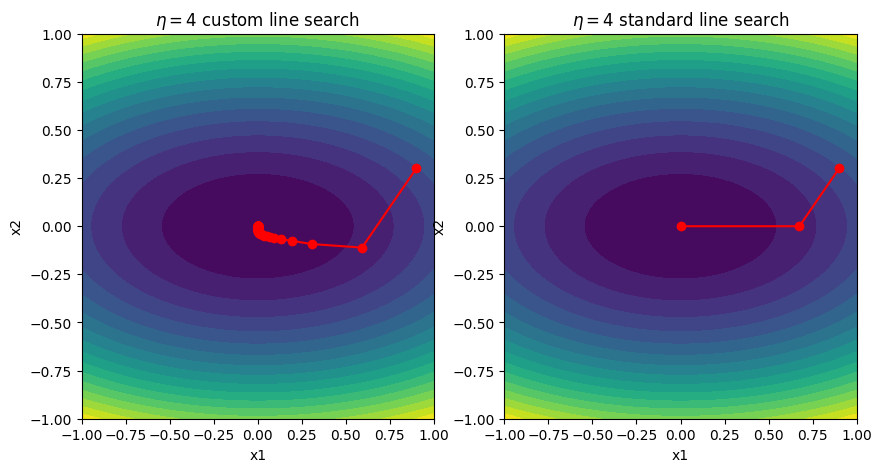

In [162]:
def GD_with_line_search(x0, f, eta, tol=1e-6, max_iter=1000):
	x = x0
	xs = [x]
	grad = jax.grad(jax.jit(f), argnums=0)
	iter = 0
	while np.linalg.norm(grad(x, eta)) > tol and iter < max_iter:
		# line search
		lr = 1
		while f(x - lr * grad(x, eta), eta) > f(x, eta) - 0.5 * lr * np.linalg.norm(grad(x, eta))**2:
			lr *= 0.5
		x = x - lr * grad(x, eta)
		iter += 1
		xs.append(x)
	if iter == max_iter:
		print('Algorithm did not converge')
	else:
		print(f'Converged in {iter} iterations to x={x}')
	return xs

def GD_with_line_searh_custom(x0, f, eta, tol=1e-6, max_iter=1000):
	x = x0
	xs = [x]
	grad = jax.grad(jax.jit(f), argnums=0)
	iter = 0
	while np.linalg.norm(grad(x, eta)) > tol and iter < max_iter:
		# line search
		grad_x = grad(x, eta)
		lr = (grad_x[0]**2 + eta**2 * grad_x[1]**2) / (grad_x[0]**2 + eta**3 * grad_x[1]**2)
		x = x - lr * grad_x
		iter += 1
		xs.append(x)
	if iter == max_iter:
		print('Algorithm did not converge')
	else:
		print(f'Converged in {iter} iterations to x={x}')
	return xs

eta = 4
x0 = np.array([0.9, 0.3])

xs = GD_with_line_searh_custom(x0, f, eta)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
# countour plot
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
[XX, YY] = np.meshgrid(x, y)
F = (XX ** 2 + eta * YY ** 2) / 2
ax.contourf(XX, YY, F, 20)
# plot the path
xs = np.array(xs)
ax.plot(xs[:, 0], xs[:, 1], 'ro-')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title(f'$\\eta = {eta}$ custom line search')

xs = GD_with_line_search(x0, f, eta)
ax = fig.add_subplot(122)
# countour plot
ax.contourf
xs = np.array(xs)
ax.plot(xs[:, 0], xs[:, 1], 'ro-')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title(f'$\\eta = {eta}$ custom line search')

plt.show()


---

# **Exercise 3**

Consider a neural network in which a vectored node $ \mathbf{v} $ feeds into two distinct vectored nodes $ \mathbf{h}_1 $ and $ \mathbf{h}_2 $, computing different functions. The functions computed at the nodes are:  
$$
\mathbf{h}_1 = \text{ReLU}(\mathbf{W}_1 \mathbf{v}), \quad \mathbf{h}_2 = \text{sigmoid}(\mathbf{W}_2 \mathbf{v}),
$$
where $ \mathbf{v} $ is the input vector, and $ \mathbf{W}_1 $ and $ \mathbf{W}_2 $ are weight matrices.

We do not know anything about the values of the variables in other parts of the network, but we are given the following:

$$
\mathbf{h}_1 = \begin{bmatrix} 2 \\ -1 \\ 3 \end{bmatrix}, \quad \mathbf{h}_2 = \begin{bmatrix} 0.2 \\ 0.5 \\ 0.3 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 2 \\ 3 \\ 5 \\ 1 \end{bmatrix}.
$$

Furthermore, the gradients of the loss $ L $ with respect to $ \mathbf{h}_1 $ and $ \mathbf{h}_2 $ are:  
$$
\frac{\partial L}{\partial \mathbf{h}_1} = \begin{bmatrix} -2 \\ 1 \\ 4 \end{bmatrix}, \quad \frac{\partial L}{\partial \mathbf{h}_2} = \begin{bmatrix} 1 \\ 3 \\ 2 \end{bmatrix}.
$$


### Task

- Show that the backpropagated loss gradient $ \frac{\partial L}{\partial \mathbf{v}} $ can be computed in terms of $ \mathbf{W}_1 $ and $ \mathbf{W}_2 $ as follows:  
$$
\frac{\partial L}{\partial \mathbf{v}} = \mathbf{W}_1^\top \begin{bmatrix} -2 \\ 0 \\ 4 \end{bmatrix} + \mathbf{W}_2^\top \begin{bmatrix} 0.16 \\ 0.75 \\ -0.42 \end{bmatrix}.
$$

- **What are the sizes of $ \mathbf{W}_1 $, $ \mathbf{W}_2 $, and $ \frac{\partial L}{\partial \mathbf{v}} $?**

**Recall the activation functions:**  
   - The ReLU function is defined as:  
     $$
     \text{ReLU}(x) = \max(0, x).
     $$
   - The sigmoid function is defined as:  
     $$
     \text{sigmoid}(x) = \frac{\exp(x)}{\exp(x) + 1}.
     $$


### answer:

<div align="center">
	<img src='image.png'>
</div>

In [159]:
import sympy as sp

# Define the variables
v = sp.Matrix([2, 3, 5, 1])
h1 = sp.Matrix([2, -1, 3])
h2 = sp.Matrix([0.2, 0.5, 0.3])
grad_L_h1 = sp.Matrix([-2, 1, 4])
grad_L_h2 = sp.Matrix([1, 3, 2])

# Define the weight matrices with symbolic variables
W1 = sp.MatrixSymbol('W1', 3, 4)
W2 = sp.MatrixSymbol('W2', 3, 4)

# Define the ReLU and sigmoid functions
ReLU = lambda x: sp.Max(0, x)
sigmoid = lambda x: sp.exp(x) / (sp.exp(x) + 1)

# Compute the backpropagated loss gradient
grad_h1_W1v = h1.applyfunc(lambda x: 1 if x > 0 else 0)
grad_h2_W2v = h2.applyfunc(lambda x: x*(1-x))
grad_L_v = W1.T * grad_L_h1.multiply_elementwise(grad_h1_W1v) + W2.T * grad_L_h2.multiply_elementwise(grad_h2_W2v)

In [160]:
grad_L_v

W1.T*Matrix([
[-2],
[ 0],
[ 4]]) + W2.T*Matrix([
[0.16],
[0.75],
[0.42]])